# Sistemi linearnih enačb - nadaljevanje

## Razcep LU

Za rešitev sistema linearnih enačb zahteva Gaussov eliminacijski postopek najmanjše število računskih operacij. 

V primeru, ko se matrika koeficientov $\mathbf{A}$ ne spreminja in se spreminja zgolj vektor konstant $\mathbf{b}$, se je mogoče izogniti ponovni Gaussovi eliminaciji matrike koeficientov. Z razcepom matrike $\mathbf{A}$ lahko pridemo do rešitve z manj računskimi operacijami. V ta namen si bomo pogledali razcep LU!

Poljubno matriko lahko zapišemo kot produkt dveh matrik:

$$
\mathbf{A}=\mathbf{B}\,\mathbf{C}.
$$

Pri tem je možnosti za zapis matrik $\mathbf{B}$ in $\mathbf{C}$ neskončno veliko.

Pri razcepu LU zahtevamo, da je matrika $\mathbf{B}$ spodnje trikotna in matrika $\mathbf{C}$ zgornje trikotna:

$$
\mathbf{A}=\mathbf{L}\,\mathbf{U}.
$$

Vsaka od matrik $\mathbf{L}$ in $\mathbf{U}$ ima $(n+1)\,n/2$ neničelnih elementov; skupaj torej $n^2+n$ neznank. Znana matrika $\mathbf{A}$ definira $n^2$ vrednosti. Za enolično določitev matrik $\mathbf{L}$ in $\mathbf{U}$ torej manjka 
$n$ enačb. Tukaj bomo uporabili razcep LU, ki dodatne enačbe pridobi s pogojem $L_{ii}=1$, $i=0, 1,\dots,n-1$.

Sistem linearnih enačb:

$$
\mathbf{A}\mathbf{x}=\mathbf{b}
$$

torej zapišemo z razcepom matrike $\mathbf{A}$:

$$
\mathbf{L}\,\underbrace{\mathbf{U}\,\mathbf{x}}_{\mathbf{y}}=\mathbf{b}.
$$

Do rešitve sistema $\mathbf{A}\mathbf{x}=\mathbf{b}$ sedaj pridemo tako, da rešimo dva trikotna sistema enačb.

Najprej izračunamo vektor $\mathbf{y}$:

$$
\mathbf{L}\,\mathbf{y}=\mathbf{b}.\qquad \textrm{(direktno vstavljanje)}
$$

Ko je $\mathbf{y}$ izračunan, lahko iz:

$$
\mathbf{U}\,\mathbf{x}=\mathbf{y}\qquad \textrm{(obratno vstavljanje)}
$$

določimo $\mathbf{x}$.

### Razcep LU matrike koeficientov $\mathbf{A}$

V nadaljevanju bomo pokazali, da Gaussova eliminacija dejanjsko predstavlja razcep LU matrike koeficientov $\mathbf{A}$. Pri tem si bomo pomagali s simbolnim izračunom, zato uvozimo paket `sympy`:

In [1]:
import sympy as sym # uvozimo sympy
sym.init_printing() # za lep prikaz izrazov

Prikaz začnimo na primeru simbolno zapisanih matrik $\mathbf{L}$ in $\mathbf{U}$ dimenzije $3\times 3$:

In [2]:
L21, L31, L32 = sym.symbols('L21, L31, L32')
U11, U12, U13, U22, U23, U33 = sym.symbols('U11, U12, U13, U22, U23, U33')
L = sym.Matrix([[  1,   0,  0],
                [L21,   1,  0],
                [L31, L32,  1]])
U = sym.Matrix([[U11, U12, U13],
                [  0, U22, U23],
                [  0,   0, U33]])

Matrika koeficientov $\mathbf{A}$ zapisana z elementi matrik $\mathbf{L}$ in  $\mathbf{U}$ torej je:

In [3]:
A = L*U
A

⎡  U₁₁           U₁₂                   U₁₃          ⎤
⎢                                                   ⎥
⎢L₂₁⋅U₁₁    L₂₁⋅U₁₂ + U₂₂         L₂₁⋅U₁₃ + U₂₃     ⎥
⎢                                                   ⎥
⎣L₃₁⋅U₁₁  L₃₁⋅U₁₂ + L₃₂⋅U₂₂  L₃₁⋅U₁₃ + L₃₂⋅U₂₃ + U₃₃⎦

Izvedimo sedaj Gaussovo eliminacijo nad matriko koeficientov $\mathbf{A}$. 

S pomočjo prve vrstice izvedemo Gaussovo eliminacijo v prvem stolpcu:

In [4]:
A[1,:] -= L21 * A[0,:]
A[2,:] -= L31 * A[0,:]
A

⎡U₁₁    U₁₂         U₁₃     ⎤
⎢                           ⎥
⎢ 0     U₂₂         U₂₃     ⎥
⎢                           ⎥
⎣ 0   L₃₂⋅U₂₂  L₃₂⋅U₂₃ + U₃₃⎦

Nadaljujemo v drugem stolpcu:

In [5]:
A[2,:] -= L32 * A[1,:]
A

⎡U₁₁  U₁₂  U₁₃⎤
⎢             ⎥
⎢ 0   U₂₂  U₂₃⎥
⎢             ⎥
⎣ 0    0   U₃₃⎦

Iz zgornje eliminacije ugotovimo:
1. matrika $\mathbf{U}$ je enaka matriki, ki jo dobimo, če izvedemo Gaussovo eliminacijo nad matriko koeficientov $\mathbf{A}$.
* izven diagonalni členi $\mathbf{L}$ so faktorji, ki smo jih uporabili pri Gaussovi eliminaciji.

### Numerična implementacija razcepa LU

Numerično implementacijo si bomo pogledali na sistemu, ki je definiran kot:

In [6]:
import numpy as np

A = np.array([[8, -6, 3],
              [-6, 6, -6],
              [3, -6, 6]], dtype=float) 
b = np.array([-14, 36, 6], dtype=float)

Izvedimo Gaussovo eliminacijo in koeficiente, s katerim množimo pivotno vrsto `m`, shranimo v matriko `L` na mesto z indeksi, kot jih ima v matriki $\mathbf{A}$ eliminirani element.

In [7]:
(v, s) = A.shape # v=število vrstic, s=število stolpcev
U = A.copy()     # pripravimo matriko U kot kopijo A
L = np.zeros_like(A) # pripravimo matriko L dimenzije enake A (vrednosti 0)
## eliminacija
for p, pivot_vrsta in enumerate(U[:-1]):
    for i, vrsta in enumerate(U[p+1:]):
        if pivot_vrsta[p]:
            m = vrsta[p]/pivot_vrsta[p]
            vrsta[p:] = vrsta[p:]-pivot_vrsta[p:]*m
            L[p+1+i, p] = m
    print('Korak: {:g}'.format(p))
    print(U)

Korak: 0
[[ 8.    -6.     3.   ]
 [ 0.     1.5   -3.75 ]
 [ 0.    -3.75   4.875]]
Korak: 1
[[ 8.   -6.    3.  ]
 [ 0.    1.5  -3.75]
 [ 0.    0.   -4.5 ]]


In [8]:
L

array([[ 0.   ,  0.   ,  0.   ],
       [-0.75 ,  0.   ,  0.   ],
       [ 0.375, -2.5  ,  0.   ]])

Dopolnimo diagonalo $\mathbf{L}$:

In [9]:
for i in range(v):
    L[i, i] = 1.

In [10]:
L

array([[ 1.   ,  0.   ,  0.   ],
       [-0.75 ,  1.   ,  0.   ],
       [ 0.375, -2.5  ,  1.   ]])

Sedaj rešimo spodnje trikotni sistem enačb $\mathbf{L}\,\mathbf{y}=\mathbf{b}$:

In [11]:
## direktno vstavljanje
y = np.zeros_like(b)
for i, b_ in enumerate(b):
    y[i] = (b_ - np.dot(L[i, :i], y[:i]))    

In [12]:
y

array([-14. ,  25.5,  75. ])

Nadaljujemo z reševanjem zgornje trikotnega sistema $\mathbf{U}\,\mathbf{x}=\mathbf{y}$:

In [13]:
U

array([[ 8.  , -6.  ,  3.  ],
       [ 0.  ,  1.5 , -3.75],
       [ 0.  ,  0.  , -4.5 ]])

In [14]:
y

array([-14. ,  25.5,  75. ])

In [15]:
## obratno vstavljanje
x = np.zeros_like(b)
for i in range(v-1, -1,-1):
    x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
x

array([-14.        , -24.66666667, -16.66666667])

Kakor smo navedli zgoraj, ob spremembi vektorja konstant $\mathbf{b}$ ponovna Gaussova eliminacija ni potrebna. Izvesti je treba samo direktno in nato obratno vstavljanje. Poglejmo primer:

In [16]:
b = np.array([-1., 6., 7.])
y = np.zeros_like(b)
for i, b_ in enumerate(b):#direktno vstavljanje
    y[i] = (b_ - np.dot(L[i, :i], y[:i]))    
x = np.zeros_like(b)
for i in range(v-1, -1,-1):# obratno vstavljanje
    x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
x

array([-4.33333333, -7.88888889, -4.55555556])

In [17]:
A.dot(x)

array([-1.,  6.,  7.])

## Pivotiranje

Poglejmo si spodnji sistem enačb:

In [18]:
A = np.array([[0, -6, 6],
              [-6, 6, -6],
              [8, -6, 3]], dtype=float) # poskusite tukaj izpustiti dtype=float in preveriet rezultat
b = np.array([6, 36, -14], dtype=float)

Če bi izvedli Gaussovo eliminacijo v prvem stolpcu matrike $\mathbf{A}$:

In [19]:
A[1,:] - A[1,0]/A[0,0] * A[0,:]

C:\Users\janko\AppData\Local\Temp\ipykernel_18128\3999418912.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  A[1,:] - A[1,0]/A[0,0] * A[0,:]
C:\Users\janko\AppData\Local\Temp\ipykernel_18128\3999418912.py:1: RuntimeWarning: invalid value encountered in multiply
  A[1,:] - A[1,0]/A[0,0] * A[0,:]


array([ nan, -inf,  inf])

Opazimo, da imamo težavo z deljenjem z 0 v prvi vrstici. Elementarne operacije, ki jih nad sistemom lahko izvajamo, dovoljujejo zamenjavo poljubnih vrstic. Sistem lahko preuredimo tako, da pivotni element ni enak 0. Vseeno se lahko zgodi, da ima pivotni element, s katerim delimo, zelo majhno vrednost $\varepsilon$. Ker bi to povečevalo zaokrožitveno napako, izmed vseh vrstic za pivotno vrstico izberemo tisto, katere pivot ima največjo absolutno vrednost.

Če med Gaussovo eliminacijo zamenjamo vrstice tako, da je pivotni element največji, to imenujemo **pivotiranje vrstic** ali tudi **delno pivotiranje**. Tako dosežemo, da je Gaussova eliminacija numerično stabilna.

Pokazati je mogoče, da pri reševanju sistema enačb $\mathbf{A}\,\mathbf{x}=\mathbf{b}$, pri katerem je matrika $\mathbf{A}$ diagonalno dominantna, pivotiranje po vrsticah ni potrebno. Reševanje je brez pivotiranja numerično stabilno.

Pravokotna matrika $\mathbf{A}$ dimenzije $n$ je **diagonalno dominantna**, če je absolutna vrednost diagonalnega elementa vsake vrstice večja od vsote absolutnih vrednosti ostalih elementov v vrstici:

$$
\left|A_{ii}\right|> \sum_{j=1, j\ne i}^n \left|A_{ij}\right|
$$


### Gaussova eliminacija z delnim pivotiranjem

Pogledali si bomo Gaussovo eliminacijo z **delnim pivotiranjem**. Brez delnega pivotiranja v $i$-tem koraku eliminacije izberemo vrstico $i$ za pivotiranje. Pri delnem pivotiranju pa najprej preverimo, ali je $i$-ti diagonalni element po absolutni vrednosti največji element v stolpcu $i$ na ali pod diagonalo; če ni, zamenjamo vrstico $i$ s 
tisto vrstico pod njo, v kateri je v stolpcu $i$ po absolutni vrednosti največji element. Z delnim pivotiranjem zmanjšamo vpliv zaokrožitvene napake na rezultat. 

V koliko bi izvedli **polno pivotiranje**, bi poleg zamenjave vrstic uporabili tudi zamenjavo vrstnega reda spremenljivk (zamenjava stolpcev). Polno pivotiranje izboljša stabilnost, se pa redko uporablja in ga tukaj ne bomo obravnavali.

Algoritem za Gaussovo eliminacijo z delnim pivotiranjem torej je:

In [20]:
def gaussova_eliminacija_pivotiranje(A, b, prikazi_korake=False):
    """ Vrne Gaussovo eliminacijo razširjene matrike koeficientov, 
    uporabi delno pivotiranje.

    :param A: matrika koeficientov
    :param b: vektor konstant
    :param prikazi_korake: ali izpišem posamezne korake
    :return Ab: trapezna razširjena matrika koeficientov
    """
    Ab = np.column_stack((A, b))
    for p in range(len(Ab)-1):
        p_max = np.argmax(np.abs(Ab[p:,p]))+p
        if p != p_max:
            Ab[[p], :], Ab[[p_max], :] = Ab[[p_max], :], Ab[[p], :]
        pivot_vrsta = Ab[p, :]                
        for vrsta in Ab[p + 1:]:
            if pivot_vrsta[p]:
                vrsta[p:] -= pivot_vrsta[p:] * vrsta[p] / pivot_vrsta[p]
        if prikazi_korake:
            print('Korak: {:g}'.format(p))
            print('Pivot vrsta:', pivot_vrsta)
            print(Ab)
    return Ab

In [21]:
A

array([[ 0., -6.,  6.],
       [-6.,  6., -6.],
       [ 8., -6.,  3.]])

In [22]:
Ab = gaussova_eliminacija_pivotiranje(A, b, prikazi_korake=True)

Korak: 0
Pivot vrsta: [  8.  -6.   3. -14.]
[[  8.    -6.     3.   -14.  ]
 [  0.     1.5   -3.75  25.5 ]
 [  0.    -6.     6.     6.  ]]
Korak: 1
Pivot vrsta: [ 0. -6.  6.  6.]
[[  8.    -6.     3.   -14.  ]
 [  0.    -6.     6.     6.  ]
 [  0.     0.    -2.25  27.  ]]


### Razcep LU z delnim pivotiranjem

Podobno kakor pri Gaussovi eliminaciji lahko tudi razcep LU razširimo z delnim pivotiranjem. Reševanje tako postane numerično **stabilno**. Pri tem moramo shraniti informacijo o zamenjavi vrstic, ki jo potem posredujemo v funkcijo za rešitev ustreznih trikotnih sistemov.

In [23]:
def LU_razcep_pivotiranje(A, prikazi_korake=False):
    """ Vrne razcep LU matriko in vektor zamenjanih vrstic pivotiranje, 
    uporabi delno pivotiranje.

    :param A: matrika koeficientov
    :param prikazi_korake: izpišem posamezne korake
    :return LU: LU matrika
    :return pivotiranje: vektor zamenjave vrstic (pomembno pri iskanju rešitve)    
    """
    LU = A.copy()
    pivotiranje = np.arange(len(A))
    for p in range(len(LU)-1):
        p_max = np.argmax(np.abs(LU[p:,p]))+p
        if p != p_max:
            LU[[p], :], LU[[p_max], :] = LU[[p_max], :], LU[[p], :]
            pivotiranje[p], pivotiranje[p_max] = pivotiranje[p_max], pivotiranje[p]
        pivot_vrsta = LU[p, :]                
        for vrsta in LU[p + 1:]:
            if pivot_vrsta[p]:
                m = vrsta[p] / pivot_vrsta[p]
                vrsta[p:] -= pivot_vrsta[p:] * m
                vrsta[p] = m
            else:
                raise Exception('Deljenje z 0.')
        if prikazi_korake:
            print('Korak: {:g}'.format(p))
            print('Pivot vrsta:', pivot_vrsta)
            print(LU)
    return LU, pivotiranje

Poglejmo si primer:

In [24]:
A = np.array([[0, -6, 6],
              [-6, 6, -6],
              [8, -6, 3]], dtype=float)
b = np.array([-14, 36, 6], dtype=float)

In [25]:
lu, piv = LU_razcep_pivotiranje(A, prikazi_korake=True)

Korak: 0
Pivot vrsta: [ 8. -6.  3.]
[[ 8.   -6.    3.  ]
 [-0.75  1.5  -3.75]
 [ 0.   -6.    6.  ]]
Korak: 1
Pivot vrsta: [ 0. -6.  6.]
[[ 8.   -6.    3.  ]
 [ 0.   -6.    6.  ]
 [-0.75 -0.25 -2.25]]


V zgornjem primeru smo uporabili kompaketen način zapisa trikotnih matrik $\mathbf{L}$ in $\mathbf{U}$; vsaka je namreč definirana s 6 elementi, pri matriki $\mathbf{L}$ pa vemo, da so diagonalni elementi enaki 1. Matrika `lu` tako vsebuje $3\times3=9$ elementov:

In [26]:
lu

array([[ 8.  , -6.  ,  3.  ],
       [ 0.  , -6.  ,  6.  ],
       [-0.75, -0.25, -2.25]])

Na diagonali in nad diagonalo so vrednosti zgornje trikotne matrike $\mathbf{U}$, pod diagonalo pa so poddiagonalni elementi matrike $\mathbf{L}$. Pri izračunu rešitve bomo upoštevali, da so diagonalne vrednosti $\mathbf{L}$ enake 1.

Numerični seznam `piv` nam pove, kako so bile zamenjane vrstice, kar je treba upoštevati pri izračunu rešitve:

In [27]:
piv

array([2, 0, 1])

Določimo sedaj še rešitev (koda za računanje rešitve je v modulu `orodja.py`)

In [28]:
from moduli import orodja

In [29]:
r = orodja.LU_resitev_pivotiranje(lu, b, piv)
r

array([ -3.66666667, -14.11111111, -16.44444444])

Preverjanje rešitve:

In [30]:
A@r

array([-14.,  36.,   6.])

## Modul ``SciPy``

Modul ``SciPy`` temelji na ``numpy`` modulu in vsebuje veliko različnih visokonivojskih programov/modulov/funkcij. Teoretično ozadje modulov so seveda različni numerični algoritmi; nekatere spoznamo tudi v okviru tega učbenika. Dober vir teh numeričnih algoritmov v povezavi s `SciPy` predstavlja [dokumentacija](https://docs.scipy.org/doc/scipy/reference/tutorial/). Za odličen uvod v SciPy si lahko ogledate [YouTube posnetek: SciPy Tutorial (2022): For Physicists, Engineers, and Mathematicians](https://www.youtube.com/watch?v=jmX4FOUEfgU).

Kratek pregled hierarhije modula:

* Linearna algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Integracija ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimizacija ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolacija ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourierjeva transformacija ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))

* Problem lastnih vrednosti (redke matrike) ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistika ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Procesiranje signalov ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Posebne funkcije ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Večdimenzijsko procesiranje slik ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* Delo z datotekami ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

V sledečih predavanjih si bomo nekatere podmodule podrobneje pogledali.

Poglejmo si, kako je znotraj ``SciPy`` implementiran *razcep LU*:

In [31]:
from scipy.linalg import lu_factor, lu_solve

Funkcija ``scipy.linalg.lu_factor`` ([dokumentacija](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu_factor.html)):

```python
lu_factor(a, overwrite_a=False, check_finite=True)
```

zahteva vnos matrike koeficientov (ali seznama matrik koeficientov) `a`, `overwrite_a` v primeru `True` z rezultatom razcepa prepiše vrednost `a` (to je lahko pomembno, da se prihrani spomin in poveča hitrost). Funkcija `lu_factor` vrne terko `(lu, piv)`:


* `lu` - $\mathbf{L}$ \ $\mathbf{U}$ matrika (matrika, ki je enake dimenzije kot `a`, vendar pod diagonalo vsebuje elemente $\mathbf{L}$, preostali elementi pa definirajo $\mathbf{U}$; diagonalni elementi $\mathbf{L}$ imajo vrednosti 1.
* `piv` - pivotni indeksi, predstavljajo permutacijsko matriko `P`: vrsta  `i` matrike `a` je bila zamenjana z vrsto `piv[i]` (v vsakem koraku se upošteva predhodno stanje, malo drugačna logika kot v naši funkciji `LU_razcep_pivotiranje`).

``lu_factor`` uporabljamo v paru s funkcijo ``scipy.linalg.lu_solve`` ([dokumentacija](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu_solve.html)), ki nam poda rešitev sistema:

```python
lu_solve(lu_and_piv, b, trans=0, overwrite_b=False, check_finite=True)
```

`lu_and_piv` je terka rezultata `(lu, piv)` iz ``lu_factor``, `b` je vektor (ali seznam vektorjev) konstant. Ostali parametri so opcijski.

Poglejmo si uporabo:

In [32]:
A = np.array([[0, -6, 6],            
              [-6, 6, -6],
              [8, -6, 3]], dtype=float)
b = np.array([-14, 36, 6], dtype=float)

In [33]:
lu, piv = lu_factor(A)

In [34]:
lu

array([[ 8.  , -6.  ,  3.  ],
       [ 0.  , -6.  ,  6.  ],
       [-0.75, -0.25, -2.25]])

In [35]:
piv

array([2, 2, 2], dtype=int32)

Pridobimo rešitev:

In [36]:
r = lu_solve((lu, piv), b)
r

array([ -3.66666667, -14.11111111, -16.44444444])

Preverimo ustreznost rešitve:

In [37]:
A@r

array([-14.,  36.,   6.])

## Računanje inverzne matrike

Inverzno matriko h kvadratni matriki $\textbf{A}$ reda $n\times n$ označimo z $\textbf{A}^{-1}$. Je matrika reda $n\times n$,  takšna, da velja 

$$\mathbf{A}\,\mathbf{A}^{-1} = \mathbf{A}^{-1}\,\mathbf{A} = \mathbf{I},$$

kjer je $\mathbf{I}$ enotska matrika.

Najbolj učinkovit način za izračun inverzne matrike od matrike $\mathbf{A}$ je rešitev matrične enačbe:

$$\mathbf{A}\,\mathbf{X}=\mathbf{I}.$$ 

Matrika $\mathbf{X}$ je inverzna matriki $\mathbf{A}$: $\mathbf{A}^{-1}=\mathbf{X}$.

Izračun inverzne matrike je torej enak reševanju $n$ sistemov $n$ linarnih enačb:

$$\mathbf{A}\,\mathbf{x}_i=\mathbf{b}_i,\qquad i=0,1,2,\dots,n-1,$$

kjer je $\mathbf{b}_i$ $i$-ti stolpec matrike $\mathbf{B}=\mathbf{I}$.

*Numerična zahtevnost:* izvedemo razcep LU nad matriko $\mathbf{A}$ (računski obseg reda $n^3$) in nato 
poiščemo rešitev za vsak $\mathbf{x}_i$ ($2\,n^2$ računskih operacij za vsak $i$). Skupni računski obseg je torej še vedno reda $n^3$. (Če bi $n$ krat izvajali Gaussovo eliminacijo, bi bil obseg reda $n^4$.) 

In [38]:
lu_piv = lu_factor(A)
lu_piv

(array([[ 8.  , -6.  ,  3.  ],
        [ 0.  , -6.  ,  6.  ],
        [-0.75, -0.25, -2.25]]),
 array([2, 2, 2], dtype=int32))

Tukaj se sedaj pokaže smisel razcepa LU; razcep namreč izračunamo samo enkrat in potem za vsak vektor konstant poiščemo rešitev tako, da rešimo dva trikotna sistema. Če bi sisteme reševali po Gaussovi metodi, bi rabili $(n^3+n^2)\,n$ računskih operacij. 

Izračunajmo inverzno matriko od matrike $\textbf{A}$. Najprej z uporabo `np.identity()` pripravimo enotsko matriko:

In [39]:
np.identity(len(A))

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Nato rešimo sistem enačb za vsak stolpec enotske matrike:

In [40]:
A_inv = np.zeros_like(A) #zeros_like vrne matriko oblike in tipa matrike A z vrednostmi 0
for b, a_inv in zip(np.identity(len(A)), A_inv):
    a_inv[:] = lu_solve(lu_piv, b)
A_inv = A_inv.T

Rešitev torej je:

In [41]:
A_inv

array([[-1.66666667e-01, -1.66666667e-01,  1.38777878e-17],
       [-2.77777778e-01, -4.44444444e-01, -3.33333333e-01],
       [-1.11111111e-01, -4.44444444e-01, -3.33333333e-01]])

Preverimo rešitev:

In [42]:
A@A_inv

array([[ 1.00000000e+00,  0.00000000e+00,  1.11022302e-16],
       [ 0.00000000e+00,  1.00000000e+00, -1.11022302e-16],
       [ 5.55111512e-17,  0.00000000e+00,  1.00000000e+00]])

Rešitev z uporabo Numpy:

In [43]:
#%%timeit
np.linalg.inv(A)

array([[-1.66666667e-01, -1.66666667e-01,  1.38777878e-17],
       [-2.77777778e-01, -4.44444444e-01, -3.33333333e-01],
       [-1.11111111e-01, -4.44444444e-01, -3.33333333e-01]])

Z ustrezno uporabo funkcij iz modula `SciPy` lahko do rešitve pridemo še hitreje. V funkcijo ``lu_solve`` lahko vstavimo vektor $\mathbf{b}$ ali matriko $\mathbf{B}$, katere posamezni stolpec $i$ predstavlja nov vektor konstant $\mathbf{b}_i$.

In [44]:
#%%timeit
lu_solve(lu_piv, np.identity(len(A)))

array([[-1.66666667e-01, -1.66666667e-01,  1.38777878e-17],
       [-2.77777778e-01, -4.44444444e-01, -3.33333333e-01],
       [-1.11111111e-01, -4.44444444e-01, -3.33333333e-01]])

## Reševanje predoločenih sistemov

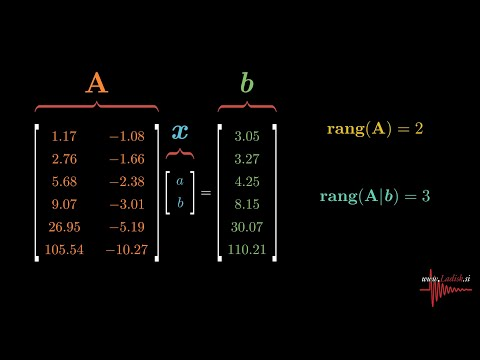

In [45]:
from IPython.display import YouTubeVideo
YouTubeVideo('N6upu99LbfQ', width=800, height=300)

Kadar rešujemo sistem $m$ linearnih enačbami z $n$ neznankami ter velja $m>n$ in je rang $n+1$, imamo predoločeni sistem.

Predoločeni (tudi **nekonsistenten sistem**):

$$\mathbf{A}\,\mathbf{x}=\mathbf{b},$$

nima rešitve. Lahko pa poiščemo najboljši približek rešitve z metodo **najmanjših kvadratov**.

Vsota kvadratov preostankov je definirana s skalarnim produktom:

$$\left\lVert r\right\rVert ^2=(\mathbf{A}\,\mathbf{x}-\mathbf{b})^T\,(\mathbf{A}\,\mathbf{x}-\mathbf{b})$$

kar preoblikujemo v:

$$\left\lVert r\right\rVert^2=\mathbf{x}^T\mathbf{A}^T\mathbf{A}\mathbf{x}-2\mathbf{b}^T\mathbf{A}\mathbf{x}+\mathbf{b}^T\mathbf{b},
$$

kjer smo upoštevali, da zaradi skalarne vrednosti velja: $\mathbf{b}^T\mathbf{A}\mathbf{x}=(\mathbf{b}^T(\mathbf{A}\mathbf{x}))^T=(\mathbf{A}\mathbf{x})^T\mathbf{b}$.

Rešitev enačbe, gradient vsote kvadratov, določa njen minimum:

$$
\nabla_x\,\left\lVert r\right\rVert^2=2\mathbf{A}^T\mathbf{A}\,\mathbf{x}-2\mathbf{A}^T\,\mathbf{b}=0
$$

Tako iz normalne enačbe:

$$
\mathbf{A}^T\mathbf{A}\,\mathbf{x}=\mathbf{A}^T\,\mathbf{b}
$$

določimo najboljši približek rešitve:

$$
\mathbf{x}=\left(\mathbf{A}^T\mathbf{A}\right)^{-1}\mathbf{A}^T\,\mathbf{b}.
$$

Z vpeljavo **psevdo inverzne matrike**: 

$$
\mathbf{A}^+=\left(\mathbf{A}^T\mathbf{A}\right)^{-1}\mathbf{A}^T
$$

k matriki $\mathbf{A}$ je rešitev predoločenega sistema zapisana:

$$
\mathbf{x}=\mathbf{A}^+\,\mathbf{b}.
$$

Zgoraj predstavljen postopek je relativo enostaven, je pa numerično zahteven in lahko v nekaterih primerih slabo pogojen; priporočeno je da v praksi psevdo inverzno matriko izračunamo z uporabo funkcij:

* `numpy.linalg.pinv` iz modula `numpy` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html)),
* Funkcij `pinv`, `pinv2` ali `pinvh` iz modula `scipy.linalg` (izbira je odvisna od obravnavanega problema; glejte [dokumentacijo](https://docs.scipy.org/doc/scipy/reference/linalg.html)),

ki temeljijo na boljših numerični metodah.

Primer sistema z enolično rešitvijo:

In [46]:
## število enačb enako številu neznank
A = np.array([[1., 2],
              [2, 3]])
b = np.array([5., 8])
np.linalg.solve(A, b)

array([1., 2.])

Naredimo sedaj predoločeni sistem (funkcija `numpy.vstack` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html)) sestavi sezname po stolpcih, `numpy.random.seed` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html)) ponastavi generator naključnih števil na vrednost semena `seed`, `numpy.random.normal` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html)) pa generira normalno porazdeljeni seznam dolžine `size` in standardne deviacije `scale`):

In [47]:
vA = np.vstack([A,A,A]) 
np.random.seed(seed=0)
vA += np.random.normal(scale=0.01, size=vA.shape) # pokvarimo rešitev -> sistem je predoločen
vA # matrika koeficientov

array([[1.01764052, 2.00400157],
       [2.00978738, 3.02240893],
       [1.01867558, 1.99022722],
       [2.00950088, 2.99848643],
       [0.99896781, 2.00410599],
       [2.00144044, 3.01454274]])

In [48]:
vb = np.hstack([b,b,b])
vb += np.random.normal(scale=0.01, size=vb.shape)
vb # vektor konstant

array([5.00761038, 8.00121675, 5.00443863, 8.00333674, 5.01494079,
       7.99794842])

Rešimo sedaj predoločen sistem:

In [49]:
Ap = np.linalg.pinv(vA)
Ap.dot(vb)

array([0.94512271, 2.02675939])

Vidimo, da predoločeni sistem z naključnimi vrednostmi (simulacija šuma pri meritvi) poda podoben rezultat kakor rešitev brez šuma. V kolikor bi nivo šuma povečevali, bi se odstopanje od enolične rešitve povečevalo.

Psevdo inverzno matriko lahko določimo tudi sami in preverimo razliko z vgrajeno funkcijo:

In [50]:
#%%timeit # preverite hitrost!
Ap2 = np.linalg.inv(vA.T@vA) @ vA.T

Ap2 - Ap

array([[-8.88178420e-16,  2.77555756e-15,  3.33066907e-16,
         3.33066907e-15, -1.11022302e-15,  2.99760217e-15],
       [ 1.22124533e-15, -6.10622664e-16,  4.44089210e-16,
        -6.66133815e-16,  1.11022302e-15, -1.27675648e-15]])

## Iterativne metode

Pogosto se srečamo z velikimi sistemi linearnih enačb, katerih matrika koeficientov ima malo od nič različnih elementov (take matrike imenujemo **redke** ali tudi **razpršene**, angl. *sparse*). 

Pri reševanju takih sistemov linearnih enačb se zelo dobro izkažejo iterativne metode; prednosti v primerjavi z direktnimi metodami so:

* računske operacije se izvajajo samo nad neničelnimi elementi (kljub iterativnemu reševanju jih je lahko manj)
* zahtevani spominski prostor je lahko neprimerno manjši.

### Gauss-Seidlova metoda

V nadaljevanju si bomo pogledali idejo *Gauss-Seidelove* iterativne metode. Najprej sistem enačb $\mathbf{A}\,\mathbf{x}=\mathbf{b}$ zapišemo kot:

$$
\sum_{j=0}^{n-1} A_{ij}x_j=b_i\qquad{}i=0,1,\dots,n-1.
$$

Predpostavim, da smo v $k-1$ koraku iterativne metode in so znani približki $x_{j}^{(k-1)}$ ($j=0,1,\dots, n-1$). Iz zgornje vsote izpostavimo člen $i$:

$$
A_{ii}\,x_{i}^{(k-1)} +\sum_{j=0, j\ne i}^{n-1} A_{ij}x_{j}^{(k-1)}=b_i\qquad{}i=0,1,\dots,n-1.
$$

Ker približki $x_{j}^{(k-1)}$ ne izpolnjujejo natančno linearnega problema, lahko iz zgornje enačbe določimo nov približek $x_{i}^{(k)}$:

$$
x_{i}^{(k)} =\frac{1}{A_{ii}}\left(b_i-\sum_{j=0}^{i-1} A_{ij}x_{j}^{(k)}-\sum_{j=i+1}^{n-1} A_{ij}x_{j}^{(k-1)}\right)
$$

Vsoto smo razdelili na dva dela in za izračun $i$-tega člena upoštevali v $k$-ti iteraciji že določene člene z indeksom manjšim od $i$.

Iterativni pristop prekinemo, ko dosežemo želeno natančnost rešitve $\epsilon$:

$$
||x_{i}^{(k)}-x_{i}^{(k-1)}||<\epsilon
$$

### Zgled

In [51]:
A = np.array([[8, -1, 1],
              [-1, 6, -1],
              [0, -1, 6]], dtype=float) 
b = np.array([-14, 36, 6], dtype=float)

Začetni približek:

In [52]:
x = np.zeros(len(A))
x

array([0., 0., 0.])

Pripravimo matriko $\mathbf{A}$ brez diagonalnih elementov (Zakaj? Poskusite odgovoriti spodaj, ko bomo izvedli iteracije.)

In [53]:
K = A.copy() #naredimo kopijo, da ne povozimo podatkov
np.fill_diagonal(K, np.zeros(3)) #spremenimo samo diagonalne elemente

In [54]:
K

array([[ 0., -1.,  1.],
       [-1.,  0., -1.],
       [ 0., -1.,  0.]])

Izvedemo iteracije:

$$
x_{i}^{(k)} =\frac{1}{A_{ii}}\left(b_i-\sum_{j=0}^{i-1} A_{ij}x_{j}^{(k)}-\sum_{j=i+1}^{n-1} A_{ij}x_{j}^{(k-1)}\right)
$$

(Ker bomo vrednosti takoj zapisali v `x`, ni treba razbiti vsote na dva dela)

In [55]:
for k in range(3):
    xk_1 = x.copy()
    print(5*'-' + f'iteracja {k}' + 5*'-')
    for i in range(len(A)): #opazujte kaj se dogaja, ko to celico poženete večkrat!
        x[i] = (b[i]-K[i,:].dot(x))/A[i,i]
        print(f'Približek za element {i}', x)
    e = np.linalg.norm(x-xk_1)
    print(f'Norma {e}')

-----iteracja 0-----
Približek za element 0 [-1.75  0.    0.  ]
Približek za element 1 [-1.75        5.70833333  0.        ]
Približek za element 2 [-1.75        5.70833333  1.95138889]
Norma 6.281360365408393
-----iteracja 1-----
Približek za element 0 [-1.28038194  5.70833333  1.95138889]
Približek za element 1 [-1.28038194  6.11183449  1.95138889]
Približek za element 2 [-1.28038194  6.11183449  2.01863908]
Norma 0.6227976321231091
-----iteracja 2-----
Približek za element 0 [-1.23835057  6.11183449  2.01863908]
Približek za element 1 [-1.23835057  6.13004808  2.01863908]
Približek za element 2 [-1.23835057  6.13004808  2.02167468]
Norma 0.04590845211691733


Preverimo rešitev

In [56]:
A@x

array([-14.01517799,  35.9969644 ,   6.        ])

Metoda deluje dobro, če je matrika diagonalno dominantna (obstajajo pa metode, ki delujejo tudi, ko matrika ni diagonalno dominantna, glejte npr.: J. Petrišič, Reševanje enačb, 1996, str 149: Metoda konjugiranih gradientov).

## Nekaj vprašanj za razmislek!

Na sliki je prikazano paličje. Ob delovanju sil $F_1$ in $F_2$ se v palicah razvijejo notranje sile $P_i$. Dimenzije paličja zagotavljata kota $\alpha$ in $\beta$.
<img src="./fig/palicje_2.2_15.png" width=300>
Sile v palicah izračunamo s pomočjo sistema linearnih enačb.

1. V simbolni obliki zapišite ravnotežje sil za točko 1 v $x$ in $y$ smeri (namig: naloga je posplošitev naloge 15 na strani 81 v knjigi Numerical methods in Eng with Py 3 z nastavkom za rešitev):
<img src="./fig/palicje_2.2_15_resitev.png" width=300>
    Zgornji nastavek ima napako v predzadnji vrstici. Rešitev sistema v knjigi je: $P_{1} = -42000, P_{2}=-12000, P_{3}= 42426, P_{4} = -12000, P_{5} = 16971, P_{6} = 12000$
).
2. V simbolni obliki zapišite ravnotežje sil za točko 2 v $x$ in $y$ smeri.
3. Najdite simbolno rešitev za sile $P_i$.
4. Uporabite podatke: $\alpha=\beta=\pi/4$, $F_1=18$ kN in $F_2=12$ kN ter najdite številčno rešitev.
5. Pripravite si funkcijo, ki bo za poljubne podatke (npr: ``podatki = {a: pi/4, b: pi/4, F1: 18000, F2: 12000}``) vrnila numerično matriko koeficientov $\mathbf{A}$ in vektor konstant $\mathbf{b}$. Če ne uspete tega narediti avtomatizirano, delajte "na roke" (splača se vam potruditi, saj bomo to večkrat rabili).
6. Razširite zgornjo funkcijo, da vam vrne rešitev linearnega sistema (uporabite kar ``numpy`` knjižnico)
7. Predpostavite $F_1=F_2=10$ kN. V vsaj petih vrednostih kota $\alpha=\beta$ od 10$^{\circ}$ do 80$^{\circ}$ izračunajte sile v palicah.
8. Za primer iz predhodne naloge narišite sile v palicah.
9. S pomočjo funkcije ``np.linalg.solve`` izračunajte inverz poljubne matrike ``A`` (nato izračunajte še inverz s pomočjo funkcije ``np.linalg.inv``).
10. Na primeru poljubnih podatkov (npr: ``podatki = {a: pi/4, b: pi/4, F1: 18000, F2: 12000}``) pokažite Gaussovo eliminacijo z delnim pivotiranjem.
11. Na primeru poljubnih podatkov (npr: ``podatki = {a: pi/4, b: pi/4, F1: 18000, F2: 12000}``) pokažite Gauss-Seidlov iterativni pristop k iskanju rešitve.

### Dodatno

Analizirajte, koliko e-mailov dobite na dan:
<img src="./fig/povprecje_emailov.jpg" width=300>
https://plot.ly/ipython-notebooks/graph-gmail-inbox-data/
(Nasvet: sledite kodi in uporabite ``matplotlib`` za prikaz).